In [1]:
import tensorflow as tf


In [2]:
 tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import pandas as pd
import numpy as np

In [4]:
train_text = pd.read_csv('train_text.csv',index_col=0)
test_text = pd.read_csv('test_text.csv',index_col=0)
train_label = pd.read_csv('train_label.csv',index_col=0)
test_label = pd.read_csv('test_label.csv',index_col=0)

In [5]:
train_text.shape

(32506, 25)

In [6]:
test_text.shape

(8351, 25)

In [7]:
train_label.shape

(64032, 3)

In [8]:
test_label.shape

(8351, 3)

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Input,Embedding,Bidirectional,LSTM,BatchNormalization,Dense,Dropout
import keras

In [10]:
sequence_size = 25
word_size=(13133-7884)
vocab_size = word_size+1

In [66]:
word_vec_size=100
hidden_size=256

def baseline_model():
    X = Input(shape = [sequence_size])
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size)(X)

    H = BatchNormalization()(H)
    H = (LSTM(hidden_size,return_sequences = True))(H)
    H = BatchNormalization()(H)
    H = (LSTM(int(hidden_size/2)))(H)
    
    H = Dropout(0.2)(H)
    
    Y = Dense(3,activation='softmax')(H)
    
    model = keras.models.Model(X,Y)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model 

In [68]:
lstm_no = baseline_model()
lstm_no_hist = lstm_no.fit(train_text,train_label,epochs=12,batch_size=512,validation_split=0.2)
lstm_no.evaluate(test_text,test_label)

Epoch 1/12
51/51 [==============================] - 6s 48ms/step - loss: 0.7555 - accuracy: 0.6921 - val_loss: 1.0801 - val_accuracy: 0.3544
Epoch 2/12
51/51 [==============================] - 2s 30ms/step - loss: 0.4536 - accuracy: 0.8421 - val_loss: 1.0496 - val_accuracy: 0.4639
Epoch 3/12
51/51 [==============================] - 2s 30ms/step - loss: 0.3960 - accuracy: 0.8613 - val_loss: 1.0599 - val_accuracy: 0.4502
Epoch 4/12
51/51 [==============================] - 2s 30ms/step - loss: 0.3622 - accuracy: 0.8732 - val_loss: 1.0717 - val_accuracy: 0.4542
Epoch 5/12
51/51 [==============================] - 2s 30ms/step - loss: 0.3340 - accuracy: 0.8875 - val_loss: 1.0273 - val_accuracy: 0.4969
Epoch 6/12
51/51 [==============================] - 2s 31ms/step - loss: 0.3018 - accuracy: 0.8983 - val_loss: 0.7188 - val_accuracy: 0.7428
Epoch 7/12
51/51 [==============================] - 2s 31ms/step - loss: 0.2687 - accuracy: 0.9135 - val_loss: 0.6226 - val_accuracy: 0.7893
Epoch 8/12
51

[0.7710028290748596, 0.8145132064819336]

In [20]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
multilabel_confusion_matrix(y_true, y_pred)

In [69]:
conf_label=lstm_no.predict(test_text)

In [73]:
confusions = multilabel_confusion_matrix(new_label,new_conf)

In [ ]:
labels=["neutral", "positive", "negative"]

In [70]:
new_conf = np.argmax(conf_label,axis=1)

In [71]:
test_label = np.array(test_label)

In [72]:
new_label = np.argmax(test_label,axis=1)

In [37]:
test_label.shape

(8351, 3)

In [39]:
conf_label.shape

(8351, 3)

In [41]:
conf_label

array([[0.1982708 , 0.05887478, 0.7428544 ],
       [0.25555465, 0.5672751 , 0.17717025],
       [0.21211043, 0.46996868, 0.31792086],
       ...,
       [0.20528872, 0.69837123, 0.09634001],
       [0.21645457, 0.64144725, 0.1420982 ],
       [0.09925117, 0.23189741, 0.66885144]], dtype=float32)

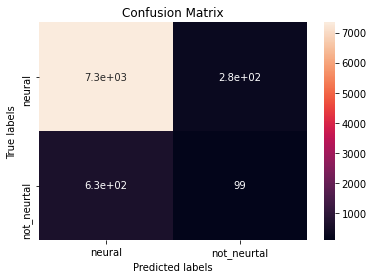

In [74]:
labels = ['neural','not_neurtal']

ax= plt.subplot()
sns.heatmap(confusions[0], annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

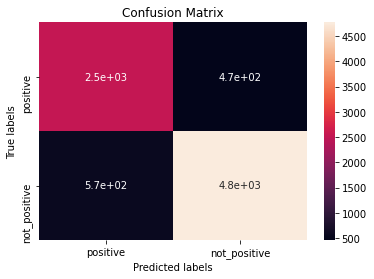

In [75]:
labels = ['positive','not_positive']

ax= plt.subplot()
sns.heatmap(confusions[1], annot=True,ax=ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

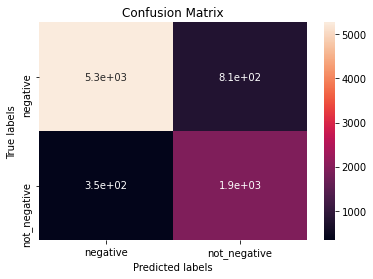

In [76]:
labels = ['negative','not_negative']

ax= plt.subplot()
sns.heatmap(confusions[2], annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

In [82]:
confusions[0][0][1]

276

In [77]:
confusions

array([[[7342,  276],
        [ 634,   99]],

       [[2548,  467],
        [ 569, 4767]],

       [[5263,  806],
        [ 346, 1936]]])

In [86]:
# neurtal 
n_recall = confusions[0][0][0] / (confusions[0][0][0]+ confusions[0][1][0])
n_precision = confusions[0][0][0] / (confusions[0][0][0] +confusions[0][0][1])
print('neutral_recall:' ,n_recall )
print('neutral_precision:', n_precision )

neutral_recall: 0.9205115346038114
neutral_precision: 0.963770018377527


In [87]:
# positive
p_recall = confusions[1][0][0] / (confusions[1][0][0]+ confusions[1][1][0])
p_precision = confusions[1][0][0] / (confusions[1][0][0] +confusions[1][0][1])
print('positive_recall:' ,p_recall )
print('positive_precision:', p_precision )

positive_recall: 0.8174526788578762
positive_recall: 0.8451077943615257


In [89]:
# negative
neg_recall = confusions[2][0][0] / (confusions[2][0][0]+ confusions[2][1][0])
neg_precision = confusions[2][0][0] / (confusions[2][0][0] +confusions[2][0][1])
print('negative_recall:' ,neg_recall )
print('negative_precision:', neg_precision )

negative_recall: 0.9383134248529149
negative_precision: 0.8671939363980886
